In [1]:
#hide
!pip install torchtext==0.8.1
!pip install -U fastbook

import fastbook
fastbook.setup_book()

     |████████████████████████████████| 1.5 MB 9.3 MB/s eta 0:00:01
     |████████████████████████████████| 108.9 MB 2.4 MB/s eta 0:00:01
     |████████████████████████████████| 720 kB 6.6 MB/s eta 0:00:01
     |████████████████████████████████| 194 kB 7.2 MB/s eta 0:00:01
     |████████████████████████████████| 46 kB 4.4 MB/s eta 0:00:01
     |████████████████████████████████| 1.1 MB 7.5 MB/s eta 0:00:01
     |████████████████████████████████| 12.5 MB 928 kB/s eta 0:00:01
     |████████████████████████████████| 53 kB 4.9 MB/s eta 0:00:011
     |████████████████████████████████| 13.2 MB 8.1 MB/s eta 0:00:01
     |████████████████████████████████| 49 kB 2.3 MB/s eta 0:00:01
     |████████████████████████████████| 455 kB 7.0 MB/s eta 0:00:01
     |████████████████████████████████| 2.4 MB 7.4 MB/s eta 0:00:01
     |████████████████████████████████| 105 kB 5.4 MB/s eta 0:00:01
     |████████████████████████████████| 1.1 MB 5.7 MB/s eta 0:00:01
     |████████████████████████████████| 5.8 MB

/Users/ts/opt/anaconda3/lib/python3.8/site-packages/fastbook/__init__.py:18: UserWarning: Missing `graphviz` - please run `conda install fastbook`
  except ModuleNotFoundError: warn("Missing `graphviz` - please run `conda install fastbook`")


In [3]:
conda install fastbook

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.

PackagesNotFoundError: The following packages are not available from current channels:

  - fastbook

Current channels:

  - https://repo.anaconda.com/pkgs/main/osx-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/osx-64
  - https://repo.anaconda.com/pkgs/r/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.



Note: you may need to restart the kernel to use updated packages.


In [4]:
#hide
from fastbook import *
from fastai.vision.widgets import *

In [57]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [58]:
learn_inf = load_learner(path/'export.pkl')

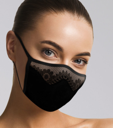

In [59]:
ims = ['https://www.inurfacemasks.com/wp-content/uploads/2020/07/w4.jpg']
dest = 'images/facemask.jpg'
download_url(ims[0], dest)
im = Image.open(dest)
im.to_thumb(128,128)

In [76]:
learn_inf.predict('images/face.jpg')

('people', tensor(0), tensor([0.9989, 0.0011]))

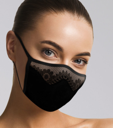

In [77]:
test = Image.open('images/facemask.jpg')
test.to_thumb(128,128)

In [79]:
learn_inf.dls.vocab

['people', 'people with face masks']

In [80]:
btn_upload = SimpleNamespace(data = ['images/facemask.jpg'])

In [81]:
img = PILImage.create(btn_upload.data[-1])

In [89]:
pred,pred_idx,probs = learn_inf.predict(img)

In [90]:
#hide_output
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

In [91]:
#hide_output
out_pl = widgets.Output()
out_pl.clear_output()

In [92]:
#hide_output
btn_run = widgets.Button(description='Classify')

In [93]:
#hide
#Putting back btn_upload to a widget for next cell
btn_upload = widgets.FileUpload()

In [94]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [95]:
#hide_output
VBox([widgets.Label('Upload your picture!'), 
      btn_upload, btn_run, out_pl, lbl_pred])

In [ ]:
!conda install -c conda-forge jupyter
!conda install notebook

Solving environment: done

## Package Plan ##

  environment location: /Users/ts/opt/anaconda3

  added / updated specs:
    - jupyter


The following packages will be SUPERSEDED by a higher-priority channel:

  conda              pkgs/main::conda-4.10.1-py38hecd8cb5_1 --> conda-forge::conda-4.10.1-py38h50d1736_0


Proceed ([y]/n)? 